In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# import pandas as pd
# import numpy as np
# df_cities = pd.read_csv("dim_cities.csv")
# df_res = pd.read_csv("dim_repondents.csv")
# df_fact_survey = pd.read_csv("fact_survey_responses.csv")
# df1 = pd.merge(df_cities , df_res , how = "inner" , on = "City_ID")
# df1 = pd.merge( df1 , df_fact_survey , how ="inner" , on = "Respondent_ID")

In [18]:
df_cities = pd.read_csv("dim_cities.csv")
df_res = pd.read_csv("dim_repondents.csv")
df_fact_survey = pd.read_csv("fact_survey_responses.csv")

In [19]:
df_cities.head()

,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2


In [20]:
print(df_cities.shape)
df_res.head()

(10, 3)


,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [21]:
df1 = pd.merge(df_cities , df_res , how = "inner" , on = "City_ID")
df1.head()

,City_ID,City,Tier,Respondent_ID,Name,Age,Gender
0,CT111,Delhi,Tier 1,120094,Armaan Bassi,31-45,Non-binary
1,CT111,Delhi,Tier 1,120120,Kiaan Uppal,19-30,Female
2,CT111,Delhi,Tier 1,120162,Hazel Chanda,65+,Non-binary
3,CT111,Delhi,Tier 1,120202,Stuvan Som,19-30,Female
4,CT111,Delhi,Tier 1,120217,Adira Raman,31-45,Female


In [22]:
df_fact_survey.columns

Index(['Response_ID', 'Respondent_ID', 'Consume_frequency', 'Consume_time',
       'Consume_reason', 'Heard_before', 'Brand_perception',
       'General_perception', 'Tried_before', 'Taste_experience',
       'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [23]:
common_col = df_fact_survey.columns.intersection(df1.columns)
common_col 

Index(['Respondent_ID'], dtype='object')

In [24]:
print(df_fact_survey.shape)
df_final = pd.merge( df1 , df_fact_survey , how ="inner" , on = common_col[0])
df_final.head()

(10000, 23)


,City_ID,City,Tier,Respondent_ID,Name,Age,Gender,Response_ID,Consume_frequency,Consume_time,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,CT111,Delhi,Tier 1,120094,Armaan Bassi,31-45,Non-binary,103064,2-3 times a month,To stay awake during work/study,...,More natural ingredients,Caffeine,Yes,Yes,TV commercials,Compact and portable cans,No,50-99,Gyms and fitness centers,Sports/exercise
1,CT111,Delhi,Tier 1,120120,Kiaan Uppal,19-30,Female,103090,2-3 times a week,To stay awake during work/study,...,Reduced sugar content,Guarana,Yes,Yes,TV commercials,Other,Yes,50-99,Supermarkets,Social outings/parties
2,CT111,Delhi,Tier 1,120162,Hazel Chanda,65+,Non-binary,103132,Rarely,Before exercise,...,Healthier alternatives,Vitamins,No,Yes,TV commercials,Compact and portable cans,No,100-150,Local stores,Sports/exercise
3,CT111,Delhi,Tier 1,120202,Stuvan Som,19-30,Female,103172,2-3 times a week,Before exercise,...,Reduced sugar content,Sugar,No,No,Other,Compact and portable cans,Yes,Above 150,Online retailers,Social outings/parties
4,CT111,Delhi,Tier 1,120217,Adira Raman,31-45,Female,103187,Daily,To stay awake during work/study,...,Other,Sugar,No,Yes,TV commercials,Collectible packaging,Yes,Below 50,Online retailers,Social outings/parties


# 1. Demographic Insights (examples)

In [25]:
df_gender = pd.DataFrame(df_final.groupby(["Gender","Consume_frequency"]).size()).reset_index().sort_values(0,ascending = False)
df_age = pd.DataFrame(df_final.groupby(["Age","Consume_frequency"]).size()).reset_index().sort_values(0,ascending = False)
df_gender.columns = ["Gender" , "Consumption" , "frequency"]
df_age.columns = ["Age" , "Consumption" , "frequency"]

In [26]:
df_gender[df_gender["Consumption"] == "Daily"].sort_values("frequency" , ascending = False)

,Gender,Consumption,frequency
7,Male,Daily,817
2,Female,Daily,466
12,Non-binary,Daily,63


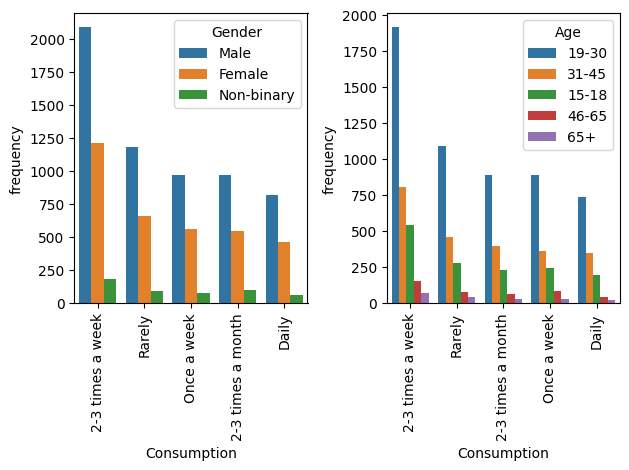

In [27]:
plt.subplot(1,2,1)
sns.barplot(data = df_gender , x = "Consumption" , y ="frequency" , hue = "Gender") 
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(data = df_age , x = "Consumption" , y ="frequency" , hue = "Age") 
plt.xticks(rotation = 90)


plt.tight_layout()
plt.show()

In [28]:
df_daily = df_gender[df_gender["Consumption"] == "Daily"]
df_daily_age = df_age[df_age["Consumption"] == "Daily"]

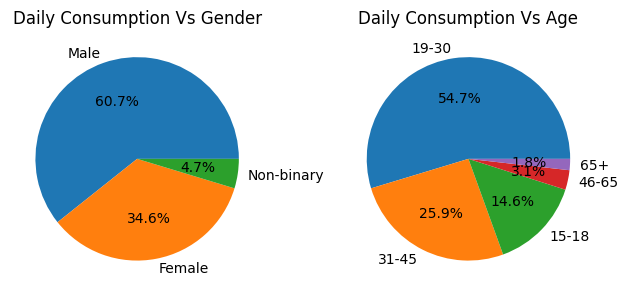

In [29]:
plt.subplot(1,2,1)
plt.pie("frequency" , labels = "Gender" , data=df_daily ,autopct= '%1.1f%%') #"%.f"
plt.title("Daily Consumption Vs Gender")


plt.subplot(1,2,2)
plt.pie("frequency" , labels = "Age" , data=df_daily_age ,autopct= '%1.1f%%') #"%.f"
plt.title("Daily Consumption Vs Age")


plt.tight_layout()
plt.show()

# Which Type of Marketing reaches the Most Youth

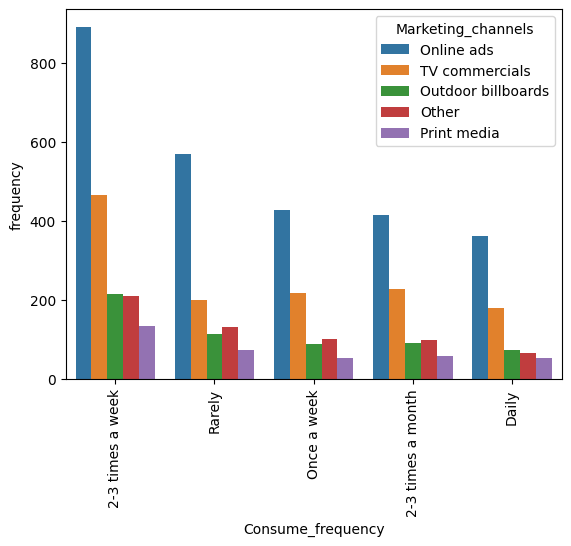

In [30]:
df_marketing = df_final.groupby(["Age","Consume_frequency","Marketing_channels"]).size().reset_index().rename(columns = {0 : "frequency"}).sort_values("frequency" , ascending = False)
df_marketing = df_marketing[df_marketing["Age"] == '19-30']
sns.barplot(data = df_marketing , x = "Consume_frequency" , y ="frequency" , hue = "Marketing_channels") 
plt.xticks(rotation = 90)
plt.show()

In [31]:
# freq = df_marketing["Consume_frequency"].unique()
# fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 18))
# for i, ax in zip(freq, axs.flat):
#     df_1 = df_marketing[df_marketing['Consume_frequency'] == i]
#     labels = df_1['Marketing_channels']
#     ax.pie(df_1['frequency'],labels=labels,shadow=False,autopct='%.1f%%')
#     ax.set_title(i, size=16, weight="bold", y=-0.05)

# plt.tight_layout()
# plt.show()

# Consumer Preferences:
a. What are the preferred ingredients of energy drinks among respondents?

b. What packaging preferences do respondents have for energy drinks?

In [32]:
print(df_final["Interest_in_natural_or_organic"].unique())

['Yes' 'No' 'Not Sure']


In [33]:
df_final["Interest_in_natural_or_organic"] = df_final["Interest_in_natural_or_organic"].apply(lambda x: "yes_for_organic" if x == "Yes" else "no_for_organic" if x == "No" else x)

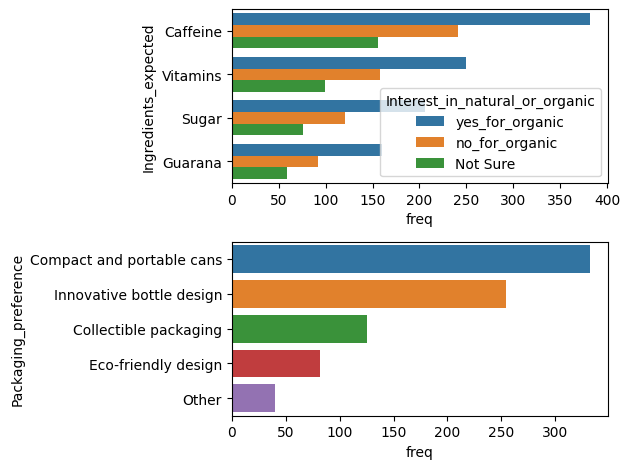

In [34]:
df_ing = df_final.groupby(["Ingredients_expected","Interest_in_natural_or_organic","Packaging_preference"]).size().reset_index().rename(columns = {0 : "freq"}).sort_values("freq", ascending = False)
plt.subplot(2,1,1)
sns.barplot(data = df_ing , x = "freq"  , y = "Ingredients_expected" , hue = "Interest_in_natural_or_organic", errorbar=None)

plt.subplot(2,1,2)
sns.barplot(data = df_ing , x = "freq"  , y = "Packaging_preference", errorbar=None)

plt.tight_layout()
plt.show()


In [35]:
df_final.columns

Index(['City_ID', 'City', 'Tier', 'Respondent_ID', 'Name', 'Age', 'Gender',
       'Response_ID', 'Consume_frequency', 'Consume_time', 'Consume_reason',
       'Heard_before', 'Brand_perception', 'General_perception',
       'Tried_before', 'Taste_experience', 'Reasons_preventing_trying',
       'Current_brands', 'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

# Competition Analysis:
a. Who are the current market leaders?

b. What are the primary reasons consumers prefer those brands over ours?

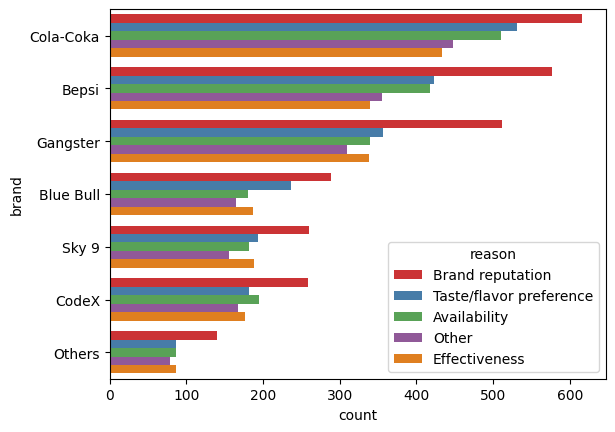

In [36]:
df_brand = pd.DataFrame(df_final[["Current_brands","Reasons_for_choosing_brands"]].value_counts()).reset_index()
df_brand
df_brand.columns = ["brand" ,"reason" ,"count"]
plot1 = sns.barplot(data = df_brand , x = "count" , y = "brand" , hue ="reason" ,palette='Set1')
#plot1.bar_label(plot1.containers[0], fmt='%.1f')
plt.show()

# Marketing Channels and Brand Awareness:
a. Which marketing channel can be used to reach more customers?

b. How effective are different marketing strategies and channels in reaching our 
customers?

# Brand Penetration:
a. What do people think about our brand? (overall rating)

b. Which cities do we need to focus more on?

In [37]:
df_codex1 = df_final[(df_final["Current_brands"] == "CodeX")]

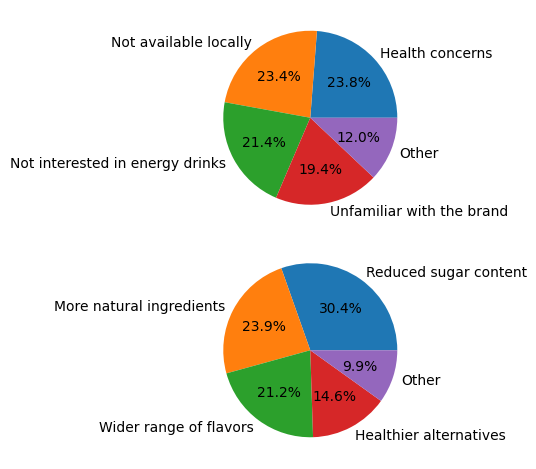

In [38]:
df_improvement = pd.DataFrame(df_codex1["Improvements_desired"].value_counts()).reset_index()
df_reason = pd.DataFrame(df_codex1["Reasons_preventing_trying"].value_counts()).reset_index()
plt.subplot(2,1,1)
plt.pie("count" , labels ="Reasons_preventing_trying" , data =df_reason ,autopct= '%1.1f%%')

plt.subplot(2,1,2)
plt.pie("count" , labels ="Improvements_desired" , data =df_improvement ,autopct= '%1.1f%%')

plt.tight_layout()
plt.show()

In [39]:
df_codex = df_final[(df_final["Current_brands"] == "CodeX") & df_final["Consume_frequency"].isin(["Daily", "2-3 times a week"])]

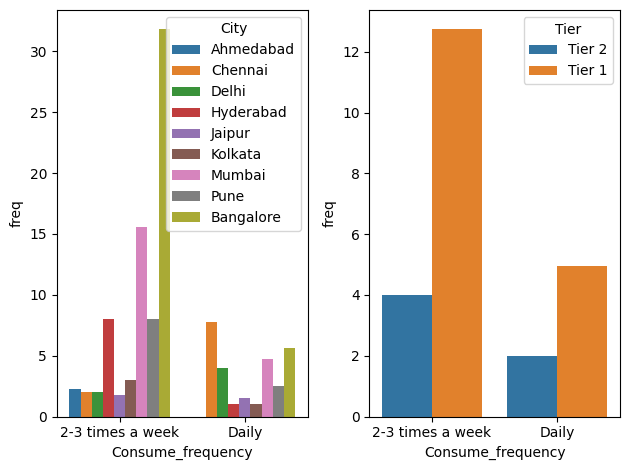

In [78]:
df_all = df_codex.groupby(["Reasons_preventing_trying","City","Consume_frequency","Tier"]).size().reset_index().rename(columns = {0 : "freq"}).sort_values(["freq","City"])
plt.subplot(1,2,1)
sns.barplot( data = df_all , x = "Consume_frequency" , y = "freq"  , hue ="City" , errorbar = None)

plt.subplot(1,2,2)
sns.barplot( data = df_all , x = "Consume_frequency" , y = "freq"  , hue ="Tier" , errorbar = None)

plt.tight_layout()
plt.show()

# Product Development
a. Which area of business should we focus more on our product development? 
(Branding/taste/availability)


In [41]:
df_final[["Price_range","Current_brands"]]

,Price_range,Current_brands
0,50-99,Blue Bull
1,50-99,Others
2,100-150,Gangster
3,Above 150,Cola-Coka
4,Below 50,Cola-Coka
...,...,...
9995,50-99,Blue Bull
9996,50-99,Cola-Coka
9997,50-99,Blue Bull
9998,Above 150,Bepsi


In [84]:
df_final["Price_range"].value_counts()

Price_range
50-99        4288
100-150      3142
Above 150    1561
Below 50     1009
Name: count, dtype: int64

# Purchase Behavior:
a. Where do respondents prefer to purchase energy drinks?

b. What are the typical consumption situations for energy drinks among 
respondents?

c. What factors influence respondents' purchase decisions, such as price range and 
limited edition packaging?

In [70]:
df_final["Consume_reason"].value_counts()

Consume_reason
Increased energy and focus       3574
To combat fatigue                2428
To enhance sports performance    1604
To boost performance             1514
Other                             880
Name: count, dtype: int64

In [72]:
df_final["General_perception"].value_counts()

General_perception
Effective    2909
Not sure     2610
Healthy      2243
Dangerous    2238
Name: count, dtype: int64

In [112]:
df_final["Limited_edition_packaging"].value_counts()

Limited_edition_packaging
No          4023
Yes         3946
Not Sure    2031
Name: count, dtype: int64

In [125]:
# Limited Edition doesnt seem to have a good reach

<Axes: xlabel='Current_brands', ylabel='count'>

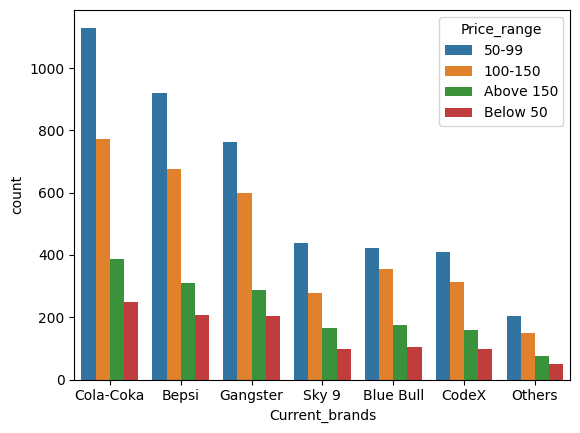

In [126]:
df_price = df_final.groupby(["Current_brands","Price_range"]).size().reset_index().rename(columns = {0:"count"}).sort_values("count", ascending = False)
sns.barplot(data = df_price , x = "Current_brands" , y ="count" , hue ="Price_range")

In [96]:
# For every Company price range of 50 - 99 reaches the most

In [118]:
print("*******")
reason = pd.DataFrame(df_final["Typical_consumption_situations"].value_counts())[0:2].index.to_list()
print(f"CodeX should concentrate - Target Audience are {reason} people to reach the most")

print("*******")
purchase = pd.DataFrame(df_final["Purchase_location"].value_counts())[0:2].index.to_list()
print(f"can be improved by giving extra Marketing and Coupons or Price Discount in the following : {purchase}")

*******
CodeX should concentrate - Target Audience are ['Sports/exercise', 'Studying/working late'] people to reach the most
*******
can be improved by giving extra Marketing and Coupons or Price Discount in the following : ['Supermarkets', 'Online retailers']


In [123]:
time = pd.DataFrame(df_final["Consume_time"].value_counts())[0:2].index.to_list()
time

['To stay awake during work/study', 'Before exercise']

In [124]:
# To Improve Students and Body Builders  - Marketing can concentrate in Gym and Colleges...